# Naive Bayes (balanceo y métricas)

Ejercicio 3 : ¿comprar o alquilar casa?

El ejercicio propone analizar las características para definir a partir de la probabilidad y el algoritmo de clasificación Naive Bayes si comprar o alquilar una casa.

Tareas

Realizar el balanceo de los datos.


*   Realizar el balanceo de los datos.
*   Sumar los gastos y crear la respectiva característica.
*   Generar la característica financiar, que corresponde al valor vivienda menos los ahorros.
*   Las características para predecir son: gastos, ingresos, ahorros, hijos, trabajo, financiar.
*   Aplicar las métricas: matriz de confusión, accuracy, precision, recall y f1 score.






| Variable       | Tipo             | Descripción                                         |
|----------------|------------------|-----------------------------------------------------|
| ingresos       | numérico entero  | Es el ingreso mensual de una familia                |
| gastos_comunes | numérico entero  | Pagos relacionados con servicios públicos y otros gastos mensuales |

### Importamos las librerías

In [1]:
# Libreria para cálculos numéricos
import numpy as np
# Libreria para manipulación y análisis de datos
import pandas as pd
# Librería para las gráficas
import matplotlib.pyplot as plt 

# Libreria para el preprocesamiento de los datos
from sklearn import preprocessing
# Libreria para el balanceo de los datos
from sklearn.utils import resample
# Librería para separar los datos de entrenamiento y de pruebas
from sklearn.model_selection import train_test_split
# Libreria para el modelo de clasificación Naive Bayes
from sklearn.naive_bayes import GaussianNB
# Libreria para la matriz de confusión
from sklearn.metrics import confusion_matrix
# Libreria para el reporte de clasificación
from sklearn.metrics import classification_report
# Librería para las métricas: Precision, Recall y F1 Score
from sklearn.metrics import precision_score, recall_score, f1_score

#### Cargamos los datos

In [2]:
data = pd.read_csv("./data/comprar_alquilar.csv")

data

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
0,6000,1000,0,600,50000,400000,0,2,2,1
1,6745,944,123,429,43240,636897,1,3,6,0
2,6455,1033,98,795,57463,321779,2,1,8,1
3,7098,1278,15,254,54506,660933,0,0,3,0
4,6167,863,223,520,41512,348932,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...
197,3831,690,352,488,10723,363120,0,0,2,0
198,3961,1030,270,475,21880,280421,2,3,8,0
199,3184,955,276,684,35565,388025,1,3,8,0
200,3334,867,369,652,19985,376892,1,2,5,0


#### Preprocesamiento

In [3]:
# Se observa si existen registros con NaN
print("Columna           NaN")
print(data.isnull().sum(axis=0))

# Si existen valores NaN se deben eliminar
#data = data.dropna()

Columna           NaN
ingresos          0
gastos_comunes    0
pago_coche        0
gastos_otros      0
ahorros           0
vivienda          0
estado_civil      0
hijos             0
trabajo           0
comprar           0
dtype: int64


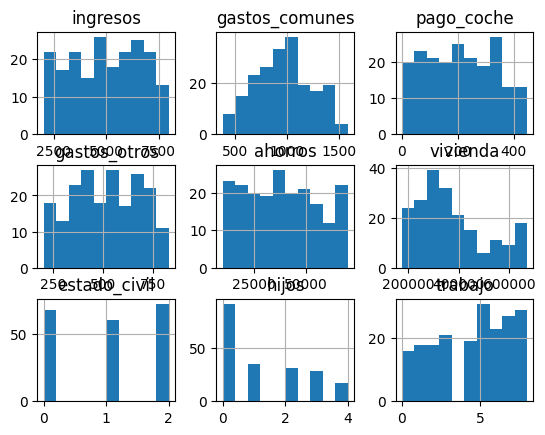

In [4]:
# Se genera el histograma de las características
data_histograma = data
data_histograma.drop(['comprar'], axis=1).hist()
plt.rcParams['figure.figsize'] = (10, 8)
plt.show()

In [5]:
# Se compara la cantidad de datos para la clase 0 y 1
data.groupby('comprar').size()

#data['comprar'].value_counts()

comprar
0    135
1     67
dtype: int64

In [6]:
# Como los datos estás desbalanceados, se utiliza la técnica de resample para balancear

# OverSample: Se crean datos para balancear los registros al valor más alto (en este caso 0 con 135)
# UnderSample: Se eliminan datos para balancear los registros al valor más bajo (en este 1 con 67)

# Se utiliza oversample
df_alto = data[data['comprar'] == 0]
df_bajo = data[data['comprar'] == 1]

data_oversample = resample(df_bajo,
                    replace = True,
                    n_samples = 135,
                    random_state = 1)

data2 = pd.concat([df_alto, data_oversample])

data2['comprar'].value_counts()

comprar
0    135
1    135
Name: count, dtype: int64

In [7]:
# Se suma el valor de gastos comunes, coche y otros gastos para obtener el total de gastos 
# y se crea la característica de gastos
data2['gastos'] = (data2['gastos_comunes'] + data2['pago_coche'] + data2['gastos_otros'])

# Se crea la característica financiar que resta al valor de la vivienda el valor del ahorro
data2['financiar'] = (data2['vivienda'] - data2['ahorros'])

In [8]:
# Se generan las estadísticas
data2.describe()

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar,gastos,financiar
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,5292.311111,978.348148,202.844444,510.929630,42089.270370,369569.881481,1.081481,1.381481,4.829630,0.500000,1692.122222,327480.611111
std,1638.901727,263.820960,120.497813,172.727342,16900.221776,128613.556428,0.804743,1.381916,2.438967,0.500929,323.862625,120200.048747
min,2008.000000,384.000000,0.000000,201.000000,10319.000000,176553.000000,0.000000,0.000000,0.000000,0.000000,1007.000000,154716.000000
25%,3997.250000,793.000000,99.000000,367.500000,28503.000000,283936.000000,0.000000,0.000000,3.000000,0.000000,1415.250000,241176.500000
50%,5659.500000,958.000000,199.500000,524.500000,41475.500000,336885.000000,1.000000,1.000000,5.000000,0.500000,1673.000000,297901.500000
75%,6515.000000,1170.250000,291.750000,656.750000,55687.500000,441181.000000,2.000000,3.000000,7.000000,1.000000,1927.500000,384290.250000
max,7984.000000,1585.000000,448.000000,828.000000,69934.000000,669540.000000,2.000000,4.000000,8.000000,1.000000,2543.000000,618621.000000


#### División del dataset en datos para entrenamiento y pruebas

In [9]:
# Se definen las características
features = ['gastos', 'ingresos', 'ahorros', 'hijos', 'trabajo', 'financiar']
X = data2[features]
# Se define la clase
y = data2['comprar']

# Se divide el dataset en datos para pruebas y entrenamiento
X_train, X_test, y_train, y_test  = train_test_split(X, y, 
                                                     train_size= 0.8,
                                                     random_state= 6)

#### Creamos el modelo y generamos la predicción

In [10]:
# Se crea el clasificador de tipo Naive Bayes
nb = GaussianNB()

# Se entrena el modelo
nb.fit(X_train, y_train)

# Se genera la predicción
prediccion = nb.predict(X_test)

#### Métricas

In [11]:
# Se genera la matriz de confusión
print(confusion_matrix(y_test, prediccion))

# Se genera el reporte de clasificación
print(classification_report(y_test, prediccion))

[[15  6]
 [ 7 26]]
              precision    recall  f1-score   support

           0       0.68      0.71      0.70        21
           1       0.81      0.79      0.80        33

    accuracy                           0.76        54
   macro avg       0.75      0.75      0.75        54
weighted avg       0.76      0.76      0.76        54



In [12]:
# Se genera la precision
print("Precision: ", round(precision_score(y_test, prediccion),2))

# Se genera el recall
print("Recall: ", round(recall_score(y_test, prediccion),2))

# Se genera el F1 Score
print("F1 Score: ", round(f1_score(y_test, prediccion),2))

Precision:  0.81
Recall:  0.79
F1 Score:  0.8


#### Predicción de prueba

In [13]:
# gastos = 1600
# ingresos = 6000
# ahorros = 50000 
# hijos = 2
# trabajo = 2
# financiar = 350000
prueba = pd.DataFrame({'gastos':    [1600],
                       'ingresos':  [6000], 
                       'ahorros':   [50000], 
                       'hijos':     [2],
                       'trabajo':   [2],
                       'financiar': [350000]})
print("Predicción: ", nb.predict(prueba))

Predicción:  [1]


In [14]:
# gastos = 1496
# ingresos = 6745
# ahorros = 43240 
# hijos = 3
# trabajo = 6
# financiar = 593657
prueba = pd.DataFrame({'gastos':    [1496],
                       'ingresos':  [6745], 
                       'ahorros':   [43240], 
                       'hijos':     [3],
                       'trabajo':   [6],
                       'financiar': [593657]})
print("Predicción: ", nb.predict(prueba))

Predicción:  [0]
